Probabilidades de encontrar el electrón en diferentes posiciones:
{0.765625: 0.013, 0.8125: 0.011, 0.296875: 0.016, 0.984375: 0.011, 0.234375: 0.014, 0.65625: 0.012, 0.6875: 0.017, 0.203125: 0.02, 0.9375: 0.017, 0.53125: 0.012, 0.875: 0.017, 0.703125: 0.022, 0.5625: 0.013, 0.71875: 0.025, 0.140625: 0.01, 0.796875: 0.011, 0.078125: 0.022, 0.96875: 0.015, 0.953125: 0.017, 0.125: 0.011, 0.1875: 0.01, 0.921875: 0.012, 0.171875: 0.017, 0.375: 0.019, 0.484375: 0.014, 0.421875: 0.021, 0.046875: 0.014, 0.859375: 0.014, 0.828125: 0.013, 0.03125: 0.014, 0.40625: 0.017, 0.453125: 0.018, 0.015625: 0.012, 0.265625: 0.019, 0.09375: 0.028, 0.4375: 0.016, 0.78125: 0.017, 0.671875: 0.011, 0.359375: 0.013, 0.3125: 0.012, 0.90625: 0.02, 0.28125: 0.013, 0.84375: 0.014, 0.546875: 0.015, 0.640625: 0.014, 0.734375: 0.022, 0.25: 0.018, 0.5: 0.013, 0.59375: 0.018, 0.625: 0.019, 0.390625: 0.015, 0.46875: 0.019, 0.0: 0.01, 0.609375: 0.025, 0.0625: 0.01, 0.328125: 0.023, 0.515625: 0.019, 0.75: 0.017, 0.21875: 0.0

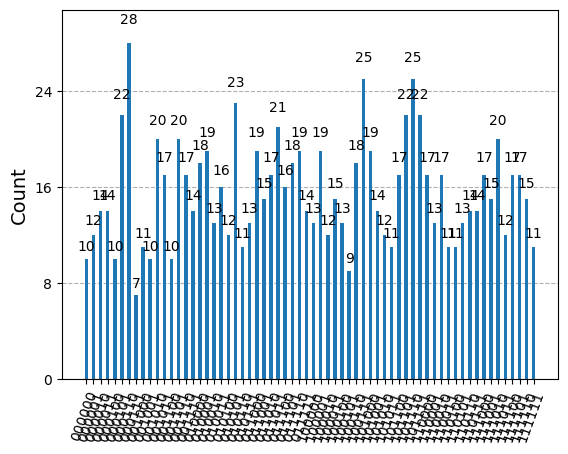

In [3]:
# Paso 1. Definir librerías
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
#import math

# Paso 2. Parámetros del problema
L = 1  # Longitud del pozo de potencial
V0 = 50  # Profundidad del pozo de potencial (en valor positivo)
N = 100  # Número de puntos en los que dividimos el espacio 

# Paso 3. Parámetros de la simulación
timesteps = 100  # Número de pasos de tiempo
dt = 0.1  # Incremento de tiempo

# Paso 4. Definir el pozo de potencial finito
def potential(x, L, V0):
    if 0 < x < L:
        return -V0
    else:
        return 0

# Paso 5. Definir el operador de evolución temporal (simplificación de la matriz de evolución)
def time_evolution_operator(circuit, dt, L, V0, N):
    for i in range(num_qubits):  
        x_i = i * L / N
        V = potential(x_i, L, V0)
        circuit.rz(2 * V * dt, i)  # Aplicamos una rotación en Z con un ángulo proporcional al potencial

# Paso 6. Crear circuito cuántico
num_qubits = int(np.log2(N))
qc = QuantumCircuit(num_qubits, num_qubits)

# Paso 7. Inicializar el estado del electrón en una superposición
qc.h(range(num_qubits))

# Paso 8. Evolución temporal
for _ in range(timesteps):
    time_evolution_operator(qc, dt, L, V0, N)

# Paso 9. Medir los qubits
qc.measure(range(num_qubits), range(num_qubits))

n = 1000 #número de veces que se va a ejecutar la simulación

# Paso 10. Simular el circuito cuántico
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

# Paso 11. Correr el circuito cuántico simulado sobre el backend
results = simulator.run(compiled_circuit, shots=n).result()

# Paso 12. Recibir los conteos de las medidas
counts = results.get_counts()

# Paso 13. Calcular las probabilidades de encontrar el electrón en diferentes regiones del espacio
probabilities = {}
for key, value in counts.items():
    position = int(key, 2) * L / (2 ** num_qubits)
    if position in probabilities:
        probabilities[position] += value / n
    else:
        probabilities[position] = value / n

# Paso 14. Mostrar resultados
print("Probabilidades de encontrar el electrón en diferentes posiciones:")
print(probabilities)
plot_histogram(counts)
